# Mini Project III: Banking Project

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objects as go

%matplotlib inline
warnings.filterwarnings('ignore')

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Account Clustering

## 1.1 Exploratory Data Analysis and Data Cleaning

### 1.1.1 Savings Account

In [31]:
twm_savings_account = pd.read_csv('datasets/twm_savings_acct.csv', sep=";")

In [32]:
twm_savings_account.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [33]:
twm_savings_account = twm_savings_account[['cust_id', 'account_active', 'starting_balance', 'ending_balance']]

In [34]:
twm_savings_account.head()

,cust_id,account_active,starting_balance,ending_balance
0,1363160,Y,113.04,122.54
1,1362487,N,651.73,12.89
2,1362548,Y,250.24,254.02
3,1362752,Y,600.26,609.33
4,1363017,N,2011.02,2901.35


In [35]:
twm_savings_account.describe()

,cust_id,starting_balance,ending_balance
count,4.210000e+02,421.000000,421.000000
mean,1.362987e+06,874.060950,1258.060736
std,2.951807e+02,1704.224338,2054.680311
min,1.362480e+06,100.240000,2.740000
25%,1.362722e+06,180.220000,254.020000
50%,1.362980e+06,310.620000,619.050000
75%,1.363253e+06,742.280000,1535.830000
max,1.363495e+06,17303.420000,22432.780000


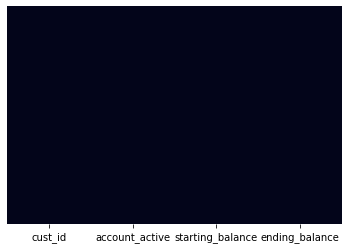

In [36]:
sns.heatmap(twm_savings_account.isnull(), yticklabels=False, cbar=False)
plt.show()

In [37]:
account_dict = {"N": 0, "Y": 1}
twm_savings_account['account_active'] = twm_savings_account['account_active'].apply(lambda x: x.strip()).map(account_dict)
twm_savings_account['amount_saved'] = twm_savings_account['ending_balance'] 

In [38]:
twm_savings_account = twm_savings_account[['cust_id', 'account_active', 'amount_saved']]
twm_savings_account.columns = ['cust_id', 'have_savings', 'amount_saved']
twm_savings_account.head()

,cust_id,have_savings,amount_saved
0,1363160,1,122.54
1,1362487,0,12.89
2,1362548,1,254.02
3,1362752,1,609.33
4,1363017,0,2901.35


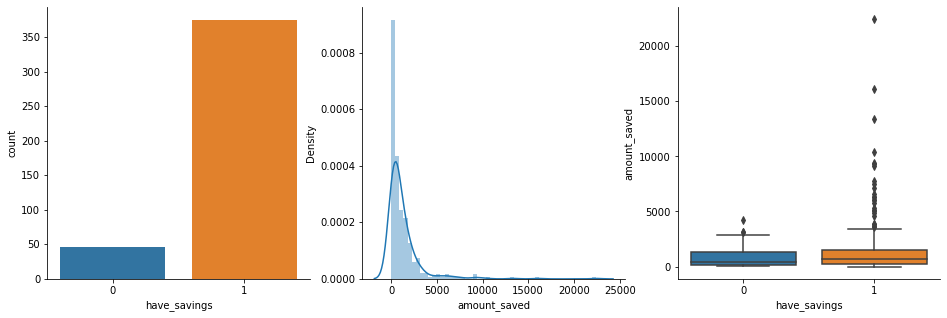

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.countplot(x='have_savings', data = twm_savings_account, ax=ax[0])
sns.distplot(twm_savings_account['amount_saved'], ax=ax[1])
sns.boxplot(x=twm_savings_account['have_savings'], y=twm_savings_account['amount_saved'], ax=ax[2])
sns.despine()
plt.show()

### 1.1.2 Credit Account

In [40]:
twm_credit_account = pd.read_csv('datasets/twm_credit_acct.csv', sep=";")

In [41]:
twm_credit_account.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [42]:
twm_credit_account[['credit_limit', 'credit_rating', 'starting_balance', 'ending_balance']].describe()

,credit_limit,credit_rating,starting_balance,ending_balance
count,468.000000,468.000000,468.000000,468.000000
mean,2647.649573,0.316239,1123.257521,1184.885662
std,2293.771202,1.453930,1636.254478,1363.065314
min,1000.000000,0.000000,0.000000,0.000000
25%,1000.000000,0.000000,0.000000,353.187500
50%,1900.000000,0.000000,568.300000,1000.000000
75%,3000.000000,0.000000,1631.635000,1358.717500
max,17300.000000,10.000000,11394.660000,9500.000000


In [43]:
twm_credit_account = twm_credit_account[['cust_id', 'account_active', 'credit_limit', 'starting_balance', 'ending_balance']]

In [44]:
twm_credit_account.head()

,cust_id,account_active,credit_limit,starting_balance,ending_balance
0,1363160,Y,1000,657.46,286.69
1,1362487,Y,3000,0.00,1548.23
2,1362548,Y,6700,6965.25,68.68
3,1362752,N,2400,2302.14,0.00
4,1363017,Y,1000,0.00,1000.00


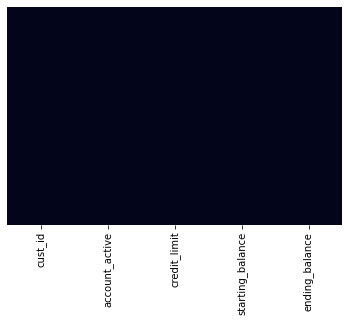

In [45]:
sns.heatmap(twm_credit_account.isnull(), yticklabels=False, cbar=False)
plt.show()

In [46]:
twm_credit_account['debt_amount'] = twm_credit_account['ending_balance']
twm_credit_account['account_active'] = twm_credit_account['account_active'].apply(lambda x: x.strip()).map(account_dict)

In [47]:
not_pay = twm_credit_account[(twm_credit_account['starting_balance'] == 0) & (twm_credit_account['account_active'] == 1)].count()['cust_id']
not_use = twm_credit_account[(twm_credit_account['ending_balance'] == 0) & (twm_credit_account['account_active'] == 1)].count()['cust_id']
print(f"{not_pay} people did not pay their previous credit balance, therefore have no credit to start with.")
print(f"{not_use} people did not have use their credit card and spend nothing throughout the period of this balance.")

140 people did not pay their previous credit balance, therefore have no credit to start with.
29 people did not have use their credit card and spend nothing throughout the period of this balance.


In [48]:
twm_credit_account = twm_credit_account[['cust_id', 'account_active', 'credit_limit', 'debt_amount']]
twm_credit_account.rename(columns={'account_active': 'has_credit'}, inplace=True)

In [49]:
twm_credit_account.head()

,cust_id,has_credit,credit_limit,debt_amount
0,1363160,1,1000,286.69
1,1362487,1,3000,1548.23
2,1362548,1,6700,68.68
3,1362752,0,2400,0.00
4,1363017,1,1000,1000.00


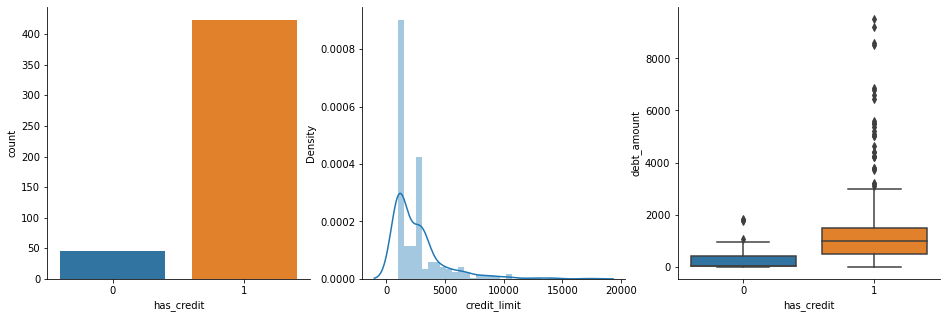

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.countplot(x='has_credit', data = twm_credit_account, ax=ax[0])
sns.distplot(twm_credit_account['credit_limit'], ax=ax[1])
sns.boxplot(x='has_credit', y='debt_amount', data=twm_credit_account, ax=ax[2])
sns.despine()
plt.show()

In [51]:
max_debt = twm_credit_account[twm_credit_account['credit_limit'] == abs(twm_credit_account['debt_amount'])].count()['cust_id']
print(f"There are {max_debt} customers who have debts that reached their credit limit.")

There are 155 customers who have debts that reached their credit limit.


### 1.1.3 Savings Transaction Data

In [52]:
twm_savings_tran = pd.read_csv('datasets/twm_savings_tran.csv', sep=";")

In [53]:
twm_savings_tran.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [ ]:
twm_savings_tran[['tran_amt', 'principal_amt', 'interest_amt', 'new_balance']].describe()

In [ ]:
sns.heatmap(twm_savings_tran.isnull(), yticklabels=False, cbar=False)
plt.show()

In [ ]:
twm_savings_tran = twm_savings_tran[['cust_id', 'principal_amt', 'tran_amt', 'interest_amt', 'new_balance']]

In [ ]:
savings_df = twm_savings_tran.groupby(['cust_id', 'principal_amt',  'interest_amt','tran_amt', 'new_balance']).size().reset_index().drop(0, axis=1)

In [ ]:
savings_df.head()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.distplot(x=savings_df['principal_amt'], ax=ax[0])
sns.distplot(x=savings_df['interest_amt'], ax=ax[1])
sns.distplot(x=savings_df['tran_amt'], ax=ax[2])
sns.despine()
plt.show()

In [ ]:
savings_df = savings_df[['cust_id', 'tran_amt']]
savings_df.columns = ['cust_id', 'savings_tran_amt']
savings_df.head()

In [ ]:
savings_to_merge = savings_df.groupby('cust_id').sum().reset_index()
savings_to_merge.head()

In [ ]:
savings_count = savings_df.groupby('cust_id').count().reset_index()
savings_count.head()

In [ ]:
savings_to_merge = pd.merge(savings_to_merge, savings_count, on='cust_id')
savings_to_merge.columns = ['cust_id', 'savings_tran_amt', 'savings_tran_count']
savings_to_merge.head()

### 1.1.4 Credit Transactions Data

In [ ]:
twm_credit_tran = pd.read_csv('datasets/twm_credit_tran.csv', sep=';')
twm_credit_tran.head()

In [ ]:
twm_credit_tran.info()

In [ ]:
twm_credit_tran[['tran_amt', 'principal_amt', 'interest_amt', 'new_balance']].describe()

In [ ]:
sns.heatmap(twm_credit_tran.isnull(), yticklabels=False, cbar=False)
plt.show()

In [ ]:
credit_df = twm_credit_tran.groupby(['cust_id', 'principal_amt',  'interest_amt','tran_amt', 'new_balance']).size().reset_index().drop(0, axis=1)
credit_df[credit_df['principal_amt'] > 0]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.distplot(x=credit_df['principal_amt'], ax=ax[0])
sns.distplot(x=credit_df['interest_amt'], ax=ax[1])
sns.distplot(x=credit_df['tran_amt'], ax=ax[2])
sns.despine()
plt.show()

In [ ]:
credit_df = credit_df[['cust_id', 'tran_amt']]
credit_df.columns = ['cust_id', 'credit_tran_amt']
credit_df.head()

In [ ]:
credit_to_merge = credit_df.groupby('cust_id').sum().reset_index()
cust_credit = credit_df.groupby('cust_id').count().reset_index()
credit_to_merge = pd.merge(credit_to_merge, cust_credit, on='cust_id')
credit_to_merge.columns = ['cust_id', 'credit_tran_amt', 'credit_tran_count']
credit_to_merge.head()

### 1.1.5 Merge to a DataFrame

In [ ]:
df1 = pd.merge(twm_savings_account, twm_credit_account, on='cust_id', how='left')
df2 = pd.merge(savings_to_merge, credit_to_merge, on='cust_id', how='left')
transaction_df = pd.merge(df1, df2, on='cust_id', how='left')
transaction_df.head()

In [ ]:
transaction_df.drop(['cust_id', 'have_savings', 'has_credit', 'credit_limit'], axis=1, inplace=True)

In [ ]:
transaction_df.fillna(0, inplace=True)

In [ ]:
len(transaction_df)

In [ ]:
#transaction_df.drop('cust_id', axis=1, inplace=True)

In [ ]:
sns.heatmap(transaction_df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [ ]:
#transaction_df.fillna(0, inplace=True)

In [ ]:
#sns.heatmap(transaction_df.isnull(), yticklabels=False, cbar=False)
#plt.show()

In [ ]:
#transaction_df['total_transactions'] = transaction_df['credit_tran_count'] + transaction_df['savings_tran_count']
#transaction_df['total_transaction_amount'] = transaction_df['credit_tran_amt'] + transaction_df['savings_tran_amt']
#transaction_df['avg_transaction'] = transaction_df['total_transaction_amount']/transaction_df['total_transactions']
#transaction_df.drop(['savings_tran_amt', 'savings_tran_count', 'credit_tran_amt', 'credit_tran_count'], axis=1, inplace=True)
#transaction_df = transaction_df.fillna(0)

In [ ]:
#sns.heatmap(transaction_df.isnull(), yticklabels=False, cbar=False)
#plt.show()

In [ ]:
#transaction_df.drop(['have_savings', 'has_credit', 'avg_transaction'], axis=1, inplace=True)

In [ ]:
#transaction_df_cluster = transaction_df.copy()
#transaction_df_cluster['cluster'] = trans_analysis

In [ ]:
#transaction_df_cluster.groupby('cluster').mean()

## 1.2 Cluster Analysis

In [ ]:
scaler = StandardScaler()
scaler.fit(transaction_df)
transaction_data = scaler.fit_transform(transaction_df)

In [ ]:
def plot_distortions(data, max_clusters=10):
    distortions = []
    
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
        
    sns.lineplot(x=range(1, max_clusters+1), y=distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortions')
    sns.despine()
    plt.show()

In [ ]:
plot_distortions(transaction_data)

In [ ]:
transaction_km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
trans_analysis = transaction_km.fit_predict(transaction_data)

In [ ]:
transaction_result = pd.DataFrame(transaction_data, columns=list(transaction_df.columns))
transaction_result['cluster'] = trans_analysis
transaction_result.head()

In [ ]:
transaction_result.groupby('cluster').mean()

In [ ]:
def plot_radar_chart(df):
    data = []
    for i in range(len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'Cluster {df.index[i]}',
                                    fill = 'toself'))
    
    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [ ]:
#radar_data = transaction_result.copy().drop(['have_savings', 'has_credit'], axis=1)
radar_data = transaction_result.groupby('cluster').mean()
radar_data.head()

#radar_data.to_csv('radar_data_test.csv')

In [ ]:
banking_df2 = transaction_df.copy()
banking_df2['cluster'] = trans_analysis
banking_df2.head()

In [ ]:
fix, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(x='cluster', y='amount_saved', data=banking_df2, palette='Blues')
plt.xlabel('Cluster')
plt.ylabel('Amount Saved ($)')
plt.title('Money Saved in Savings Account', fontweight='bold', fontsize=16, ha='center')
sns.despine()
plt.show()

In [ ]:
fix, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(x='cluster', y='debt_amount', data=banking_df2, palette='Blues')
plt.xlabel('Cluster')
plt.ylabel('Amount of Debt ($)')
plt.title('Debt Incurred in Credit Account', fontweight='bold', fontsize=16, ha='center')
sns.despine()
plt.show()

In [ ]:
fix, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(x='cluster', y='savings_tran_amt', data=banking_df2, palette='Blues')
plt.xlabel('Cluster')
plt.ylabel('Transaction Amount ($)')
plt.title('Net Transaction Amount from Savings Account', fontweight='bold', fontsize=16, ha='center')
sns.despine()
plt.show()

In [ ]:
fix, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(x='cluster', y='credit_tran_amt', data=banking_df2, palette='Blues')
plt.xlabel('Cluster')
plt.ylabel('Transaction Amount ($)')
plt.title('Net Transaction Amount from Credit Account', fontweight='bold', fontsize=16, ha='center')
sns.despine()
plt.show()

In [ ]:
fix, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(x='cluster', y='savings_tran_count', data=banking_df2, palette='Blues')
plt.xlabel('Cluster')
plt.ylabel('Number of Transactions')
plt.title('Transactions from Savings Account', fontweight='bold', fontsize=16, ha='center')
sns.despine()
plt.show()

In [ ]:
fix, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(x='cluster', y='credit_tran_count', data=banking_df2, palette='Blues')
plt.xlabel('Cluster')
plt.ylabel('Number of Transactions')
plt.title('Transactions from Credit Account', fontweight='bold', fontsize=16, ha='center')
sns.despine()
plt.show()

In [ ]:
plot_radar_chart(radar_data)

## 1.3 PCA Analysis

### 1.3.1 PCA Plot

In [ ]:
transaction_pca = PCA(n_components=2)
transaction_components = transaction_pca.fit_transform(transaction_data)

In [ ]:
transaction_pca_df = pd.DataFrame(transaction_components, columns=['PC1', 'PC2'])
transaction_pca_df['cluster'] = trans_analysis

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=transaction_pca_df, hue='cluster')
sns.despine()
plt.show()

### 1.3.2 Scree Plot

In [ ]:
scree_pca = PCA()
scree_pca_components = scree_pca.fit_transform(transaction_data)

In [ ]:
scree_df = pd.DataFrame({'var': scree_pca.explained_variance_ratio_ * 100, 'PC':[f"PC{i}" for i in range(1, 7)]})
scree_df

In [ ]:
sns.barplot(x='PC', y='var', data=scree_df, color='lightblue')
sns.despine()
plt.show()

### 1.3.3 Loading Plot

In [ ]:
transaction_loadings = transaction_pca.components_.T * np.sqrt(transaction_pca.explained_variance_)
transaction_loadings_df = pd.DataFrame(transaction_loadings, columns=['PC1', 'PC2'], index=list(transaction_df.columns))

In [ ]:
transaction_properties = list(transaction_df.columns)
sns.set_style('ticks')
sns.scatterplot(x='PC1', y='PC2', data=transaction_loadings_df)

for i in range(len(transaction_properties)):
    plt.text(transaction_loadings_df.iloc[i]['PC1']+0.02, transaction_loadings_df.iloc[i]['PC2']+0.02, transaction_properties[i])

sns.despine()
plt.show()

# 2. Demographic and Account Clustering

In [ ]:
twm_customers = pd.read_csv('datasets/twm_customer.csv', sep=";")
twm_customers.head()

In [ ]:
twm_customers = twm_customers[['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children']]

In [ ]:
transaction_df2 = pd.merge(df1, df2, on='cust_id', how='left')
combined_df = pd.merge(twm_customers, transaction_df2, on='cust_id', how='left')
combined_df.fillna(0, inplace=True)
combined_df.head()

In [ ]:
demo_account_df = combined_df.copy()
demo_account_df['total_tran_count'] = demo_account_df['savings_tran_count'] + demo_account_df['credit_tran_count']
demo_account_df['total_tran_amount'] = demo_account_df['savings_tran_amt'] + demo_account_df['credit_tran_amt']

In [ ]:
demo_account_df.drop(['cust_id','savings_tran_amt', 'credit_tran_amt', 'savings_tran_count', 'credit_tran_count', 'has_credit', 'have_savings', 'total_tran_count', 'years_with_bank'], axis=1, inplace=True)

In [ ]:
demo_account_df.drop(['total_tran_amount'], axis=1, inplace=True)

In [ ]:
demo_account_df.drop(['credit_limit'], axis=1, inplace=True)

In [ ]:
demo_account_df.drop(['cluster'], axis=1, inplace=True)

## 2.1 Cluster Analysis

In [ ]:
scaler = MinMaxScaler()
scaler.fit(demo_account_df)
demo_account_data = scaler.fit_transform(demo_account_df)

In [ ]:
plot_distortions(demo_account_data)

In [ ]:
demo_account_km = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
demo_account_analysis = demo_account_km.fit_predict(demo_account_data)

In [ ]:
demo_account_df = pd.DataFrame(demo_account_data, columns=demo_account_df.columns)
demo_account_df['cluster'] = demo_account_analysis
demo_account_df.head()

In [ ]:
demo_account_plot.to_csv('demo_account_plot.csv')

In [ ]:
demo_account_plot = demo_account_df.groupby('cluster').mean()

In [ ]:
plot_radar_chart(demo_account_plot)

## 2.2 PCA Plot

In [ ]:
demo_account_pca = PCA(n_components=2)
demo_account_components = demo_account_pca.fit_transform(demo_account_data)

In [ ]:
demo_account_pca_df = pd.DataFrame(demo_account_components, columns=['PC1', 'PC2'])
demo_account_pca_df['cluster'] = demo_account_analysis

In [ ]:
sns.scatterplot(x='PC1', y='PC2', data=demo_account_pca_df, hue='cluster')
sns.despine()
plt.show()

In [ ]:
scree_pca = PCA()
scree_pca_components = scree_pca.fit_transform(demo_account_data)

In [ ]:
sns.barplot(x='PC', y='var', data=scree_df, color='lightblue')
sns.despine()
plt.show()

In [ ]:
demo_account_loadings = demo_account_pca.components_.T * np.sqrt(demo_account_pca.explained_variance_)
demo_account_loadings_df = pd.DataFrame(demo_account_loadings, columns=['PC1', 'PC2'], index=list(demo_account_df.columns)[:-1])

In [ ]:
demo_account_loadings_df

In [ ]:
demo_account_properties = list(demo_account_df.columns)[:-1]
sns.set_style('ticks')
sns.scatterplot(x='PC1', y='PC2', data=demo_account_loadings_df)

for i in range(len(demo_account_properties)):
    plt.text(demo_account_loadings_df.iloc[i]['PC1']+0.005, demo_account_loadings_df.iloc[i]['PC2']+0.005, demo_account_properties[i])

sns.despine()
plt.show()